In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import pie_chart, likert

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
# mapping of old labels to new one
d11_rename_mapping = {
    'Mostly agile': 'Mostly agile',
    'Balanced between agile and traditional': 'Balanced between agile and traditional',
    'Totally traditional': 'Totally traditional',
    'Mostly traditional': 'Mostly traditional',
    'Totally agile': 'Totally agile',
    "I don't know": "I don't know"
}

In [13]:
order = [2, 3, 1, 0, 4]
remove_value(df,'0','D11_Agile_Development')
remove_value(df,'I don\'t know','D11_Agile_Development')
# labels of our pie chart
labels = list(df['D11_Agile_Development'].value_counts().index)
labels = [labels[i] for i in order]
print(labels)
# total answers of each label
values = list(df['D11_Agile_Development'].value_counts())
values = [values[i] for i in order]
print(values)


['Totally traditional', 'Mostly traditional', 'Balanced between agile and traditional', 'Mostly agile', 'Totally agile']
[41, 29, 77, 89, 23]


In [14]:
# normalize to the sum become 100
sum_values = sum(values)
normalized_values = [(float(v)/sum_values)* 100 for v in values]

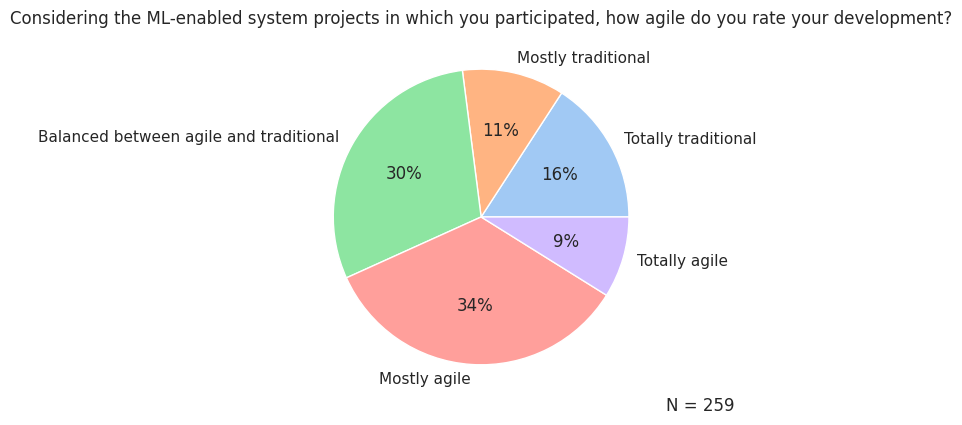

In [15]:
# compute total of answer considered in this question
total_answers = "N = " + str(sum_values)

pie_chart(normalized_values, rename_values(d11_rename_mapping, labels), 
          title="Considering the ML-enabled system projects in which you participated, how agile do you rate your development?",
          total_answers=total_answers)

In [16]:
# print(labels)
# substitute position of labels to keep an order from lower to higher - not necessary in this case

#print(labels)

In [17]:
d11_df = pd.DataFrame({'Agile Development': df['D11_Agile_Development']})

In [18]:
# remove 'I don't know' and not answered options
d11_df = d11_df[d11_df['Agile Development'] != "I don't know"]
d11_df = d11_df[d11_df['Agile Development'] != '0']

/home/puc/.local/share/virtualenvs/napiml-analysis-N7Un6vA-/lib/python3.10/site-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


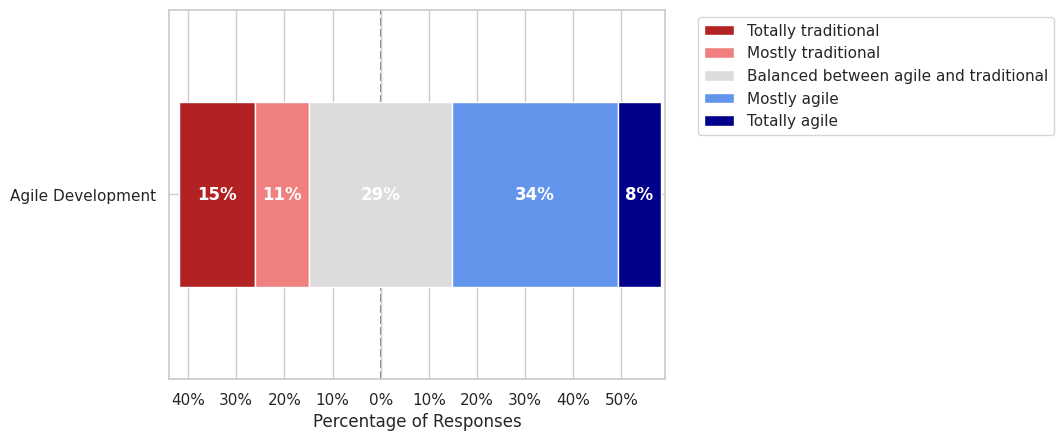

In [19]:
likert(d11_df, labels,use_percentage=True, bar_label=True)

/home/puc/.local/share/virtualenvs/napiml-analysis-N7Un6vA-/lib/python3.10/site-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


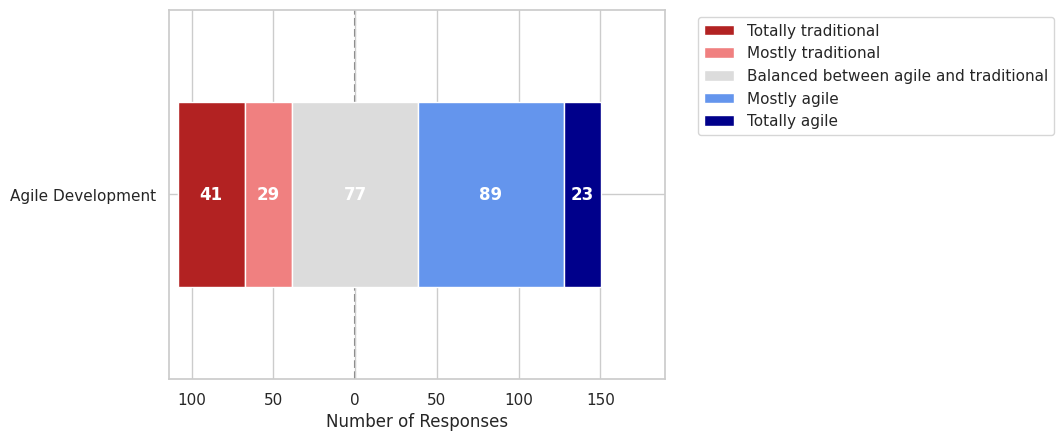

In [20]:
likert(d11_df, labels,use_percentage=False, bar_label=True)